异常数据，我常代指的是机器学习或者是统计分析中的脏数据。为什么他们异常或者脏呢？ 是因为这些数据不符合你期望当中的规律，给你或你的模型带来困扰。而且很可能是收集数据时，

因为人工差错、机器传感器差错而导致的数据异常。再或者某一个 sample 的数据没有被采集，这也会引发数据批量处理中的异常。

既然数据异常经常发生，又无可避免，我们就来看看如何能找到合适的解决方案。

### 不合预期的数据
上面我们说，异常数据，我定义为脏数据，说白了，就是不合预期的数据。注意，***如果你是搞科研的、做数据分析的， 如果没有明显的证据，你采集到的数据，你最好不要认为认定为异常数据，否者容易偏离数据真实性。***

那么其他大多数情况，我们都可以对表现得不符合预期的数据进行过滤或者修改。在我看来，有典型的两类情况就属于异常。

1. 数据缺失，表现为 pandas 中的 None，np.nan
2. 数据值异常，表现为明显与其他的值分布不一，比如其它值都在 10 上下，但有个值飙升到了 1000。  
首先我们先说 NaN (Not a Number) 类型的吧，因为这个比较常见。因为无非就是数据没有采集完整，或者仪器没有记录上，或者没办法获取到对应的数据。

### 找到NaN数据
那么，如果数据是别人给你的，或者你采集完，你第一次看到。你怎么确定你的数据中有没有空或 NaN 呢？

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame([[1, None],[np.nan, 4]])
df

,0,1
0,1.0,NaN
1,NaN,4.0


帮我点击一下上面的运行，生成一份带 NaN 的数据，我们看看它显示出来是什么样。 下面我们来用 .isna() 找找那些是 NaN 数据。

In [2]:
df.isna()

,0,1
0,False,True
1,True,False


很明显，pandas 判定 None 和 np.nan 都属于 NaN（Not a Number）。 同理，还有一个功能 .notna() 可以找到不是 NaN 的。

In [3]:
df.notna()

,0,1
0,True,False
1,False,True


你可以试试另外一种写法，能够达到同样的 .notna() 目的。请在上面输入 ~df.isna()。 ~ 代表的是反向选择的意思，如果结果里面有 True，就会反向成 False， 同理，False 反向成 True。

### NaN的影响
哈，现在发现你的数据中有 NaN? 不要怕，如果你知道 NaN 对你数据统计或运算的影响，你就不会担惊受怕，也知道要如何规避掉这些影响了。 比如下面就有一组包含 NaN 的数据。我们对它进行简单的运算。

In [4]:
df = pd.DataFrame({
    "a": [1, None, 1], 
    "b": [np.nan, 4, 4]
})
print("skipped NaN:\n", df.mean(axis=0))
print("\n\nnot skipped:\n", df.mean(axis=0, skipna=False))

skipped NaN:
 a    1.0
b    4.0
dtype: float64


not skipped:
 a   NaN
b   NaN
dtype: float64


对比 skipna 参数的不同取值，可以发现，其实在正常运算中，pandas 是不考虑 NaN 值的，也就是说不会把 NaN 带入运算，如果考虑 NaN 的话， mean 就会是 (1+1)/3 和 (4+4)/3 因为有三个数据。赶紧检查一下你以前的数据，看看是不是忽视掉了 NaN 的影响。

比如你在弄世界人口数据，发现青少年的数据都是 NaN，那你在计算人口平均年龄的时候，岂不是均龄都偏老，我们都进入了老龄化社会啦？ 你看错误的统计，会带来错误的分析结果。一定要注意你的数据里有没有 NaN。

OK，赶紧检查一下你的数据，发现有 NaN，恭喜你。你成功经历了数据分析师的日常情况。我们来看看作为数据分析师，机器学习专员，有没有什么利器帮我们解决这些情况。 首先，你有两种手段可以采用：  

1. 移除所有包含 NaN 的部分。
2. 将 NaN 数据替换成更合理的数据。

### 移除NaN
这个简单，最轻松。既然数据有问题，我们干脆舍弃它。我常在下面这些情况下采取这种策略。

+ 我的数据量原本就很大，NaN 数据也不多，我丢几个也无妨
+ 没办法直接填充上其他的数值，违背了数据真实性
+ 机器学习的某些算法对数据分布十分讲究，我不能随便改动数据导致数据分布不同，所以只能丢弃  
明白了这些，你估计心里也有个底，看看到底要不要丢。 如果丢，很简单，只需要 dropna() 就好了。

In [6]:
df = pd.DataFrame({
    "a": [1, None, 3], 
    "b": [4, 5, 6]
})
df.dropna(axis=0) #如果有nan，删除整行

,a,b
0,1.0,4
2,3.0,6


选择要施加的 axis 比如 axis=0 的时候，如果某一 row 有 NaN，就会丢弃这一 row。同理 axis=1 的时候， column 有 NaN 丢弃 column，你自己改改试试吧。

### 填充NaN
填充 NaN 也是一种处理 NaN 值的方法，不过工序要稍稍比 dropna() 多一些。我会在这种情况下考虑使用填充的方法。
+ 数据量比较少，而且数据明显有一定的规律
+ 数据的分布对我的结果影响不大  
通常我们要填充，可以用均值填充，或者默认值填充。

In [7]:
df = pd.DataFrame({
    "a": [1, None, 3], 
    "b": [4, 5, 6]
})
a_mean = df["a"].mean()
new_col = df["a"].fillna(a_mean)
df["a"] = new_col
df

,a,b
0,1.0,4
1,2.0,5
2,3.0,6


上面我们就是用均值填充的一个案例。你也可以用默认值，比如你采集了一批类别数据，包括这几个类 喜欢，不喜欢，还行。 那你 NaN 就可以考虑用 还行 代替。

我上面提到了 数据量比较少，而且数据明显有一定的规律，这条怎么理解呢？比如我的 b column 数据是齐全的，二期 a column 和 b column 是有一定关系的。 比如等比例关系。比如下面，我发现 b 很多时候是 a 的 4 倍，那么，我可以利用 b 的计算值给 a 做填充。

In [10]:
df = pd.DataFrame({
    "a": [1, None, 3, None], 
    "b": [4, 8, 12, 12]
})
a_nan = df["a"].isna()
print(a_nan)
a_new_value = df["b"][a_nan] / 4
print(a_new_value)
new_col = df["a"].fillna(a_new_value)
df["a"] = new_col
df

0    False
1     True
2    False
3     True
Name: a, dtype: bool
1    2.0
3    3.0
Name: b, dtype: float64


,a,b
0,1.0,4
1,2.0,8
2,3.0,12
3,3.0,12


当然，也可以不用 fillna() 这个功能。直接用老办法给 a column 赋值。条条道路通罗马，只要你思路明确，都能解决。

In [11]:
df = pd.DataFrame({
    "a": [1, None, 3, None], 
    "b": [4, 8, 12, 12]
})
a_nan = df["a"].isna()
df.loc[a_nan, "a"] =  df["b"][a_nan] / 4
df

,a,b
0,1.0,4
1,2.0,8
2,3.0,12
3,3.0,12


### 不符合范围的值
最后我还想提一个情况。数据采集出现了问题，有些明显不符合取值范围的值也算是一种异常。这种情况我在做模型训练的时候经常遇到。 模型很容易被这样的数据搞坏，只要在这种异常数据上训练一下，模型就爆炸瘫痪了，异常数据对模型训练还是很不友善的。

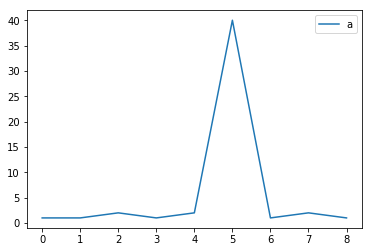

In [12]:
import matplotlib
%matplotlib inline

df = pd.DataFrame({
    "a": [1, 1, 2, 1, 2, 40, 1, 2, 1],
})
df.plot()

假设，我明显发现这组数据中的 40 很不符合逻辑，我得把它处理掉。用 clip() 设置一下数据的范围，超出范围的就被剪裁到范围边界。

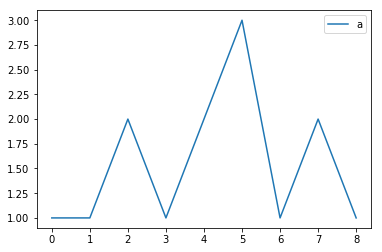

In [13]:
df["a"] = df["a"].clip(lower=0, upper=3)
df.plot()

只想对某一个边界做出限制？那你就只调那一个边界（lower/upper）就好了，你在上面试试吧。

### 总结
对于做数据分析，机器学习的你来说，脏数据，异常数据就是一种生活常态，上面介绍了很多有用的工具。对你肯定有帮助。